In [1]:
import random
random.seed(42)

In [3]:
YAML_CONFIG = 'VisDrone.yaml'
PROJECT_NAME = "new_train"

def get_yaml_config(section: str):
    import yaml
    with open(YAML_CONFIG) as stream:
        try:
            return yaml.safe_load(stream)[section]
        except yaml.YAMLError as exc:
            print(exc)


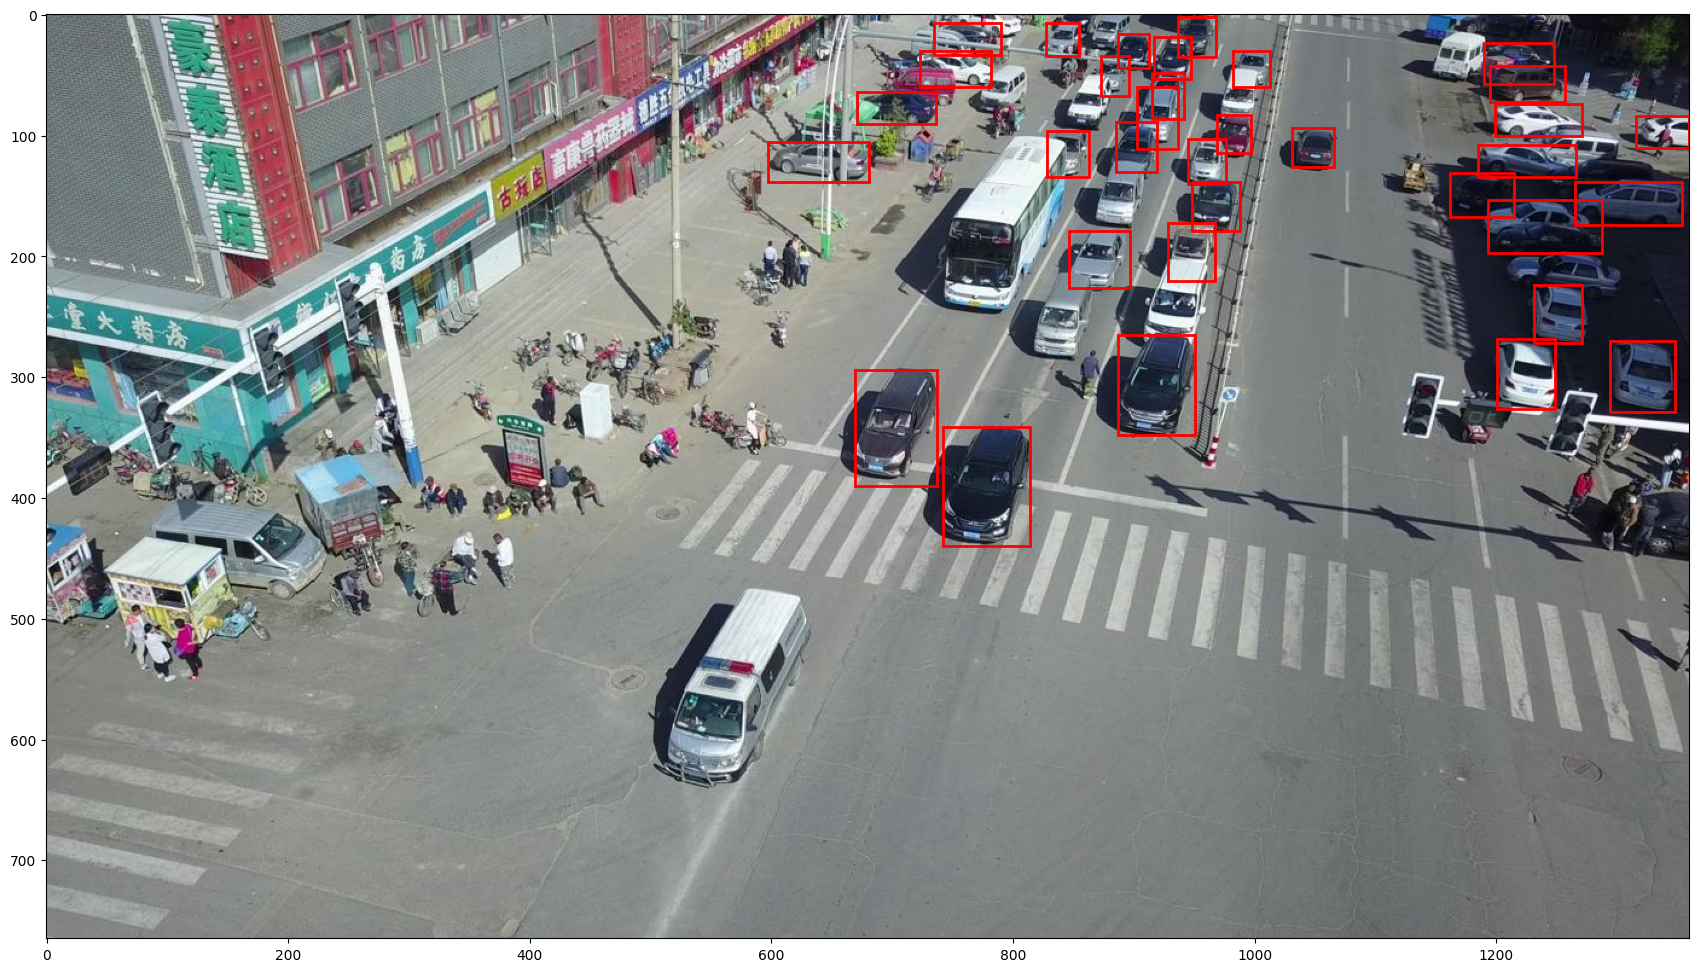

In [2]:
from Pipeline import Dataset
prepare_cfg = get_yaml_config('preparing')


# prepare_cfg
data = Dataset(**prepare_cfg)
data.show_random_image()

In [ ]:
from Pipeline import Trainer

trainer = Trainer("./projects", PROJECT_NAME, get_yaml_config("training"))
trainer.train(epochs=1)

Ultralytics 8.3.111  Python-3.11.0 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3070, 8191MiB)
engine\trainer: task=detect, mode=train, model=yolo11s.pt, data=train.yaml, epochs=1, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=1, cache=False, device=None, workers=8, project=./projects\new_train, name=train, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=False, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, lin

train: Scanning D:\projects\visdrone\dataset\VisDrone2019-DET-train\labels.cache... 6133 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6133/6133 [00:00<?, ?it/s]

train: WARNING  D:\projects\visdrone\dataset\VisDrone2019-DET-train\images\0000140_00118_d_0000002.jpg: 1 duplicate labels removed


val: Fast image access  (ping: 0.10.1 ms, read: 356.577.0 MB/s, size: 146.5 KB)


val: Scanning D:\projects\visdrone\dataset\VisDrone2019-DET-val\labels.cache... 515 images, 0 backgrounds, 0 corrupt: 100%|██████████| 515/515 [00:00<?, ?it/s]


Plotting labels to projects\new_train\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to projects\new_train\train
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      8.35G      1.694      1.332      1.143         57        640: 100%|██████████| 384/384 [01:38<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.03it/s]


                   all        515      14064      0.686      0.519      0.548      0.211

1 epochs completed in 0.030 hours.
Optimizer stripped from projects\new_train\train\weights\last.pt, 19.1MB
Optimizer stripped from projects\new_train\train\weights\best.pt, 19.1MB

Validating projects\new_train\train\weights\best.pt...
Ultralytics 8.3.111  Python-3.11.0 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3070, 8191MiB)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:07<00:00,  2.26it/s]


                   all        515      14064      0.686      0.519      0.548       0.21
Speed: 0.2ms preprocess, 1.4ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to projects\new_train\train


In [4]:
from Pipeline import create_metrics, plot_validate


validator = create_metrics('./projects')
plot_validate(validator([PROJECT_NAME]))

Ultralytics 8.3.111  Python-3.11.0 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3070, 8191MiB)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access  (ping: 0.10.0 ms, read: 905.5136.9 MB/s, size: 125.5 KB)


val: Scanning D:\projects\visdrone\dataset\VisDrone2019-DET-val\labels.cache... 515 images, 0 backgrounds, 0 corrupt: 100%|██████████| 515/515 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:08<00:00,  3.83it/s]


                   all        515      14064      0.685      0.519      0.549      0.211
Speed: 0.2ms preprocess, 3.0ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs\detect\val141


<Figure size 1200x1200 with 4 Axes>

In [ ]:
from Pipeline import benchmark_report


df = benchmark_report('./projects', ['drone'], 'train.yaml', engines=['-'], devices=['cpu'])

df

Setup complete  (12 CPUs, 31.9 GB RAM, 242.5/265.6 GB disk)

Benchmarks complete for ./projects\drone\train\weights\best.pt on train.yaml at imgsz=640 (30.11s)
Benchmarks legend:  -  Success  -  Export passed but validation failed  -  Export failed
    Format Status  Size (MB)  metrics/mAP50-95(B)  Inference time (ms/im)    FPS
0  PyTorch               5.2               0.5131                   45.06  22.19



,Format,Status❔,Size (MB),metrics/mAP50-95(B),Inference time (ms/im),FPS,device,model
0,PyTorch,✅,5.2,0.5131,45.06,22.19,cpu,./projects\drone\train\weights\best.pt


: 

In [ ]:
from Pipeline import create_export



In [5]:
%load_ext tensorboard

In [6]:
tensorboard --logdir drone\train

In [2]:
#Проводим валидацию модели
from ultralytics import YOLO

model = YOLO(f'{model_path}/best.pt')   #загружаем самую лучшую модель
metrics = model.val()

print(metrics.results_dict)

Ultralytics 8.3.94  Python-3.9.1 torch-1.13.0+cu117 CUDA:0 (NVIDIA GeForce RTX 3070, 8191MiB)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs


val: Scanning D:\projects\visdrone\dataset\VisDrone2019-DET-val\labels.cache... 517 images, 0 backgrounds, 0 corrupt: 100%|██████████| 517/517 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:09<00:00,  3.30it/s]


                   all        517      14066       0.84      0.729      0.802      0.567
Speed: 0.2ms preprocess, 3.6ms inference, 0.0ms loss, 4.2ms postprocess per image
Results saved to runs\detect\val37
{'metrics/precision(B)': 0.8404498483262193, 'metrics/recall(B)': 0.7286364282667425, 'metrics/mAP50(B)': 0.802093802513176, 'metrics/mAP50-95(B)': 0.5667306958714249, 'fitness': 0.5902670065356}


In [3]:
#Пример работы
model = model.eval()
results = model("./dataset/VisDrone2019-DET-test-dev/images/0000006_00159_d_0000001.jpg", save=True)  

#файл с боксами в папке demo

for result in results:
    result.show()  


image 1/1 d:\projects\visdrone\dataset\VisDrone2019-DET-test-dev\images\0000006_00159_d_0000001.jpg: 384x640 39 cars, 21.9ms
Speed: 1.5ms preprocess, 21.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs\detect\predict2


In [4]:
#Экспортируем в формат onnx

from ultralytics import YOLO
import shutil

model = YOLO(f'{model_path}/best.pt')   #загружаем самую лучшую модель

model.fuse()    #слияние слоев для оптимизации производительности

onnx_path = model.export(format="onnx",
             simplify=True, #упрощаем
             dynamic=True, #возможность обрабатывать батчами
             device=0   #gpu
             )

#перемещаем в папку с моделями
shutil.move(onnx_path, './models/small/y11_100ep16b640.onnx')  #В названии указываем параметры обучения 100эпох 16батч 640px

YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs
Ultralytics 8.3.94  Python-3.9.1 torch-1.13.0+cu117 CUDA:0 (NVIDIA GeForce RTX 3070, 8191MiB)

PyTorch: starting from 'drone_s\train\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (18.3 MB)

ONNX: starting export with onnx 1.14.1 opset 16...
ONNX: slimming with onnxslim 0.1.36...
ONNX: export success  14.7s, saved as 'drone_s\train\weights\best.onnx' (36.1 MB)

Export complete (14.8s)
Results saved to D:\projects\visdrone\drone_s\train\weights
Predict:         yolo predict task=detect model=drone_s\train\weights\best.onnx imgsz=640  
Validate:        yolo val task=detect model=drone_s\train\weights\best.onnx imgsz=640 data=./VisDrone.yaml  
Visualize:       https://netron.app


'./models/small/y11_100ep16b640.onnx'